<ROOT.TFile object ("/Users/gleb/software/alignTrack/mpIIDESY/P0_Off_100_Mis_U_B/0/trackRecoPlots.root") at 0x7fac4a153550>
<ROOT.TFile object ("/Users/gleb/software/alignTrack/mpIIDESY/P0_Off_100_Mis_U_B/1/trackRecoPlots.root") at 0x7fac4a153be0>
<ROOT.TH2F object ("h_verticalPos_vs_time") at 0x7fac42bd1600>
tmpNameTH1_00
<ROOT.TH1D object ("tmpNameTH1_00") at 0x7fac495dc1b0>
<ROOT.TH2F object ("h_verticalPos_vs_time") at 0x7fac45805600>
tmpNameTH1_11
<ROOT.TH1D object ("tmpNameTH1_11") at 0x7fac4a15c730>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: s12_vertical
Info in <TCanvas::Print>: png file s12_vertical.png has been created


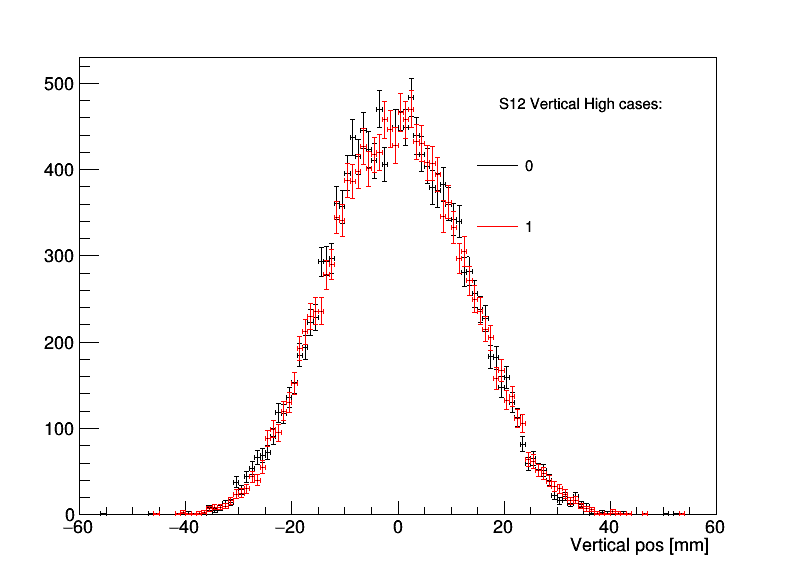

In [33]:
import sys, os
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")

from ROOT import TH1D, TH2D, TF1, TCanvas, TFile, gStyle, TLegend, gROOT

#hack in the "0th" case at the front 


# TODO

cases=[0, 1]
# cases.insert(0, 0) 
# print(cases) 

station12Path = "Extrapolation/vertices/station12/h_verticalPos_vs_time"
path="/Users/gleb/software/alignTrack/mpIIDESY/P0_Off_100_Mis_U_B" 
label="High"

canvasName = "s12_vertical"
canvasTitle = "S12 Vertical"
legendName = cases 
colorHisto = moduleArray
hitsTotal_s12_nom = - 1 # global container 

#create main canvas 
canvas = TCanvas(canvasName, canvasTitle, 800, 600)
#Postion legend once per main loop accordingly 
legend =  TLegend( 0.87, 0.87, 0.59, 0.55) 

scr_files = []

#now stack the dist.
for i_total, i_case in enumerate(cases):
    
    #open the case root file 
    fullPath=path+"/"+str(i_case)
    fileName=fullPath+"/trackRecoPlots.root"
    scrFile = TFile.Open(fileName)
    print(scrFile)  
    scr_files.append(scrFile)

#now stack the dist.
for i_total, i_case in enumerate(cases):
     
           
    #Get the TH2F 
    histo_2D = scr_files[i_total].Get(station12Path)
    print(histo_2D)
    
    #Apply 30 us time cut and get TH1
    first_bin = histo_2D.GetXaxis().FindBin(30.0)
    tmpNameTH1 = "tmpNameTH1_"+str(i_case)+str(i_total) # assign a new "name pointer" to the TH1 object for each loop 
    print(tmpNameTH1)
    hist_1D = histo_2D.ProjectionY(tmpNameTH1, first_bin, -1)
    print(hist_1D)
    hist_1D.SetTitle("")
    hist_1D.GetXaxis().SetRangeUser(-60, 60) # applying a maximum range cut 
    hist_1D.GetYaxis().SetTitleOffset(1.4);
    hist_1D.SetLineColor(colorHisto[i_total])
    legenObject = hist_1D    
    legenValue1 = str(legendName[i_total])
    legend.AddEntry(legenObject,str(legenValue1),"L") 
    legend.SetTextSize(.028)
    

    # #Normalisation 
    # #only for nominal case
    # if (i_case == 0):
    #     hits_histo_nom = scrFile.Get(hitTimeHistoPath_s12)
    #     first_bin_nom = hits_histo_nom.GetXaxis().FindBin(0.03) # get integral for 30us ->
    #     last_bin_nom = hits_histo_nom.GetXaxis().FindBin(1.0) # get integral for 30us ->  
    #     hitsTotal_s12_nom=hits_histo_nom.Integral(first_bin_nom, last_bin_nom) 

    # #all cases (inc. nominal)
    # hits_histo = scrFile.Get(hitTimeHistoPath_s12)
    # first_bin = hits_histo.GetXaxis().FindBin(0.03) # get integral for 30us ->
    # last_bin = hits_histo.GetXaxis().FindBin(1.0) # get integral for 30us ->  
    # hitsTotal_s12=hits_histo.Integral(first_bin, last_bin) 

    # # norm = hist_1D.GetEntries() / (hitsTotal_s12/hitsTotal_s12_nom)
    # # hist_1D.Scale(norm); # normalise the histo 
    # # hist_1D.GetYaxis().SetTitle("Enteries (Normalised Tracks/(case_hits/nominal_hits))")
   
    if (i_total == 0):
        hist_1D.Draw("E1")
        #hist_1D.Fit(gF, "QR") # quite fit over the specified range above
                
    else:
        hist_1D.Draw("E1 same")
        #hist_1D.Fit(gF, "QR same") # quite fit over the specified range above
    
    legend.Draw("same")
  
           
   

#Do some final massagin and save to a file
legend.SetHeader(canvasTitle+" "+str(label)+" cases: ", "C"); # option "C" allows to center the header
gStyle.SetOptStat(0)
gStyle.SetOptFit(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetLegendTextSize(0.023)
canvas.Draw()
canvas.Print(str(canvasName)+".png")
